<a href="https://colab.research.google.com/github/alyhussein86/C6oUVdljHlRZgnaq/blob/main/P5_ValueInvestor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
from pandas import DataFrame, to_datetime
from sklearn.metrics import mean_absolute_error
from datetime import timedelta, datetime

In [2]:
# Provide the path to your Excel file
excel_file_path = '/content/2020Q1Q2Q3Q4-2021Q1.xlsx'

# Read the Excel sheet into a pandas DataFrame
df = pd.read_excel(excel_file_path,'Russia - Sberbank Rossii PAO (S')

In [3]:
print(df)

                    Date           Price                Open             High  \
0    2021-03-31 00:00:00          291.02                 294           294.42   
1    2021-03-30 00:00:00          293.25              294.86           295.72   
2    2021-03-29 00:00:00           293.3              289.72           294.09   
3    2021-03-26 00:00:00          291.22              288.63           292.75   
4    2021-03-25 00:00:00          286.66               286.5           287.03   
..                   ...             ...                 ...              ...   
307  2020-01-09 00:00:00          257.99               259.4           261.76   
308  2020-01-08 00:00:00          259.15              253.57           259.15   
309  2020-01-06 00:00:00           253.9              254.75           254.84   
310  2020-01-03 00:00:00             255              255.99           258.19   
311      Highest: 296.07  Lowest: 172.15  Difference: 123.92  Average: 234.52   

                 Low    Vol

In [4]:
df = df.iloc[:-1,:2]
print(df)

                    Date   Price
0    2021-03-31 00:00:00  291.02
1    2021-03-30 00:00:00  293.25
2    2021-03-29 00:00:00   293.3
3    2021-03-26 00:00:00  291.22
4    2021-03-25 00:00:00  286.66
..                   ...     ...
306  2020-01-10 00:00:00  258.19
307  2020-01-09 00:00:00  257.99
308  2020-01-08 00:00:00  259.15
309  2020-01-06 00:00:00   253.9
310  2020-01-03 00:00:00     255

[311 rows x 2 columns]


In [5]:
# Filtering DF before the Q1 of second year
specific_date_str = "2021-01-01"
specific_date = pd.to_datetime(specific_date_str)

filtered_df = df[df['Date'] < specific_date]

filtered_df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

<ipython-input-5-8da71e3a88d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)


In [6]:
print(filtered_df)

                      ds       y
61   2020-12-30 00:00:00  271.65
62   2020-12-29 00:00:00     272
63   2020-12-28 00:00:00   274.7
64   2020-12-25 00:00:00  270.64
65   2020-12-24 00:00:00  269.32
..                   ...     ...
306  2020-01-10 00:00:00  258.19
307  2020-01-09 00:00:00  257.99
308  2020-01-08 00:00:00  259.15
309  2020-01-06 00:00:00   253.9
310  2020-01-03 00:00:00     255

[250 rows x 2 columns]


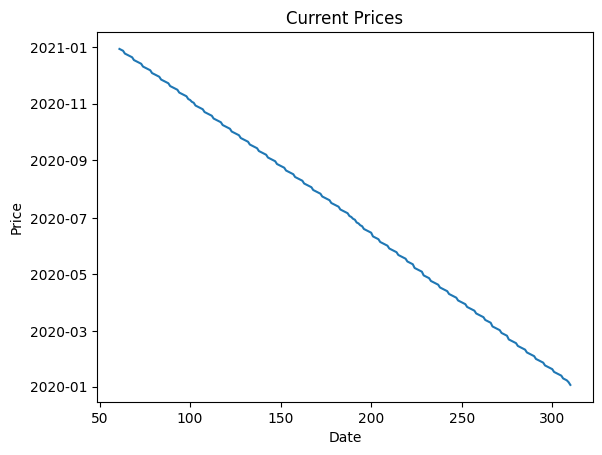

In [7]:
# plot the time series
# filtered_df.plot()
# plt.show()
plt.plot(filtered_df['ds'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Current Prices')
plt.show()

In [8]:
# Create a Prophet model
model = Prophet()

# Fit the model
model.fit(filtered_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp70_xswb2/uv5nxhdd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp70_xswb2/_1by8xet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39720', 'data', 'file=/tmp/tmp70_xswb2/uv5nxhdd.json', 'init=/tmp/tmp70_xswb2/_1by8xet.json', 'output', 'file=/tmp/tmp70_xswb2/prophet_model85i56_j1/prophet_model-20230829081727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=91)
future.tail(91)

,ds
250,2020-12-31
251,2021-01-01
252,2021-01-02
253,2021-01-03
254,2021-01-04
...,...
336,2021-03-27
337,2021-03-28
338,2021-03-29
339,2021-03-30


In [10]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
336,2021-03-27,349.146049,323.535842,376.021949
337,2021-03-28,350.085605,324.456740,377.295598
338,2021-03-29,364.034137,335.090807,393.642144
339,2021-03-30,366.556438,338.860550,395.491861
340,2021-03-31,368.353886,339.028265,398.674090


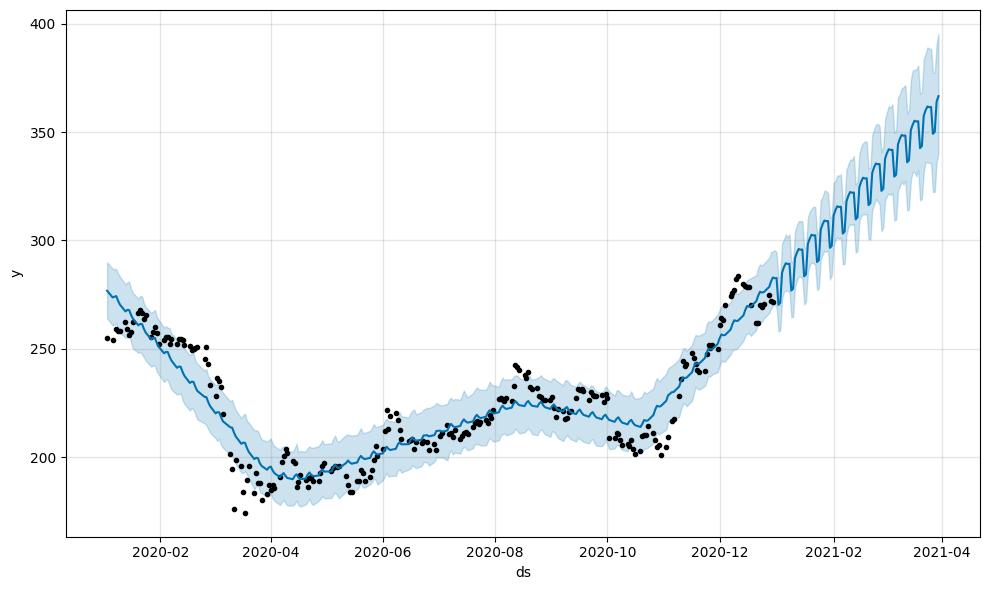

In [13]:
fig1 = model.plot(forecast)

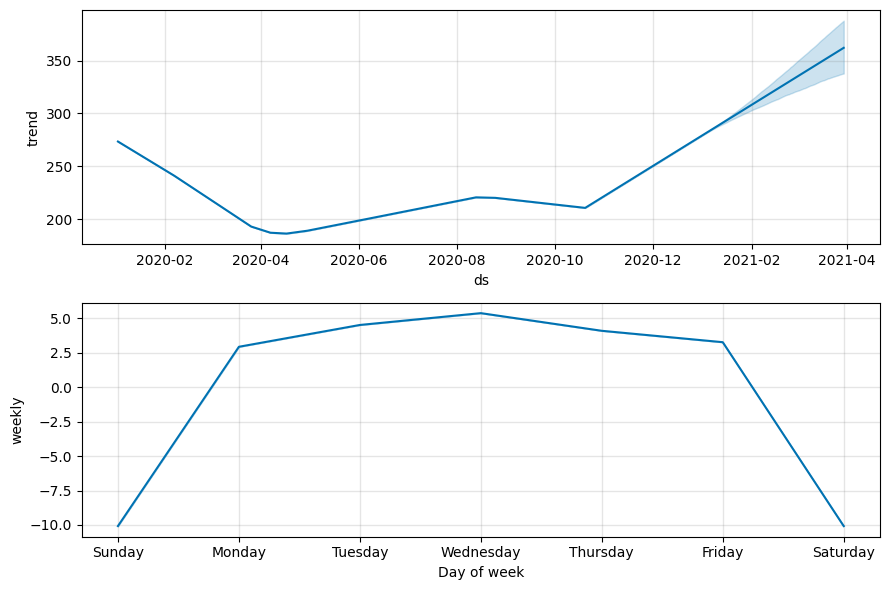

In [14]:
fig2 = model.plot_components(forecast)

In [15]:
plot_plotly(model, forecast)

In [20]:
weekend_days = [0,0,0,0,0,1,1]  # Saturday is 5, Sunday is 6

In [27]:
start_date = specific_date.date()
end_date = (specific_date + timedelta(89)).date()

In [28]:
print(start_date)
print(end_date)

2021-01-01
2021-03-31


In [29]:
# Calculate working days by excluding weekends
business_days = np.busday_count(start_date, end_date, weekmask=weekend_days)

print("Number of business days:", business_days)

Number of business days: 26


In [31]:
forecasted = forecast[~forecast['ds'].dt.dayofweek.isin(weekend_days)]

In [36]:
forecasted[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(64)

,ds,yhat,yhat_lower,yhat_upper
251,2021-01-01,282.625652,270.048174,294.106164
252,2021-01-02,270.223513,256.149216,282.407339
253,2021-01-03,271.163068,258.431666,283.383137
256,2021-01-06,289.431349,276.570759,301.729279
257,2021-01-07,289.089990,276.143425,301.137306
...,...,...,...,...
334,2021-03-25,361.435649,335.466376,388.570161
335,2021-03-26,361.548188,335.185848,390.072458
336,2021-03-27,349.146049,323.535842,376.021949
337,2021-03-28,350.085605,324.456740,377.295598


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['yhat'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['yhat_lower'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['yhat_upper'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['yhat'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['yhat_lower'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['yhat_upper'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['yhat', 'yhat_lower'], ['yhat_lower', 'yhat_upper']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['ds', 'yhat', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['ds', 'yhat_lower', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['ds', 'yhat_upper', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['ds', 'count()', None], **{})
chart

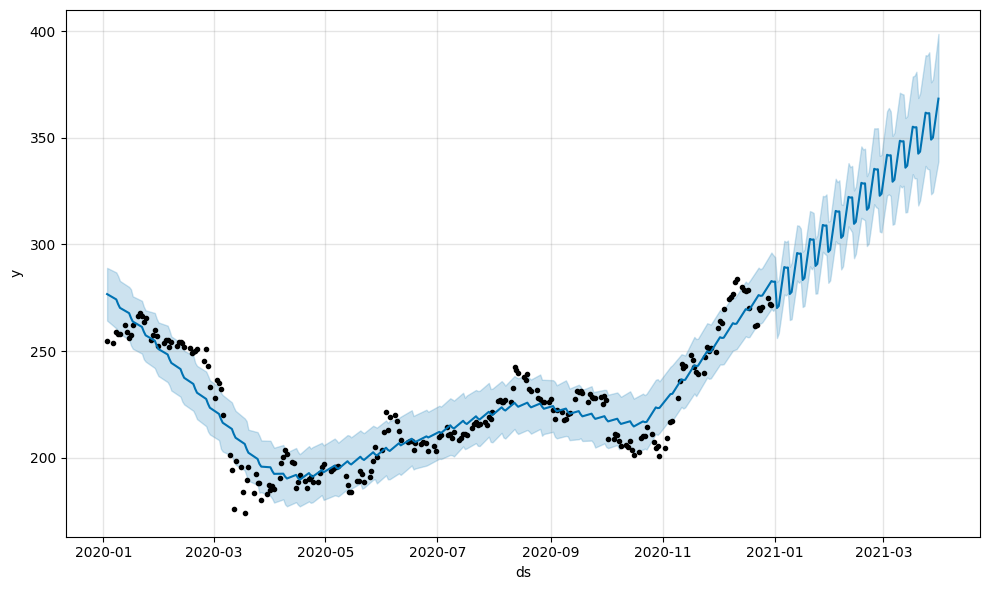

In [38]:
fig3 = model.plot(forecasted)

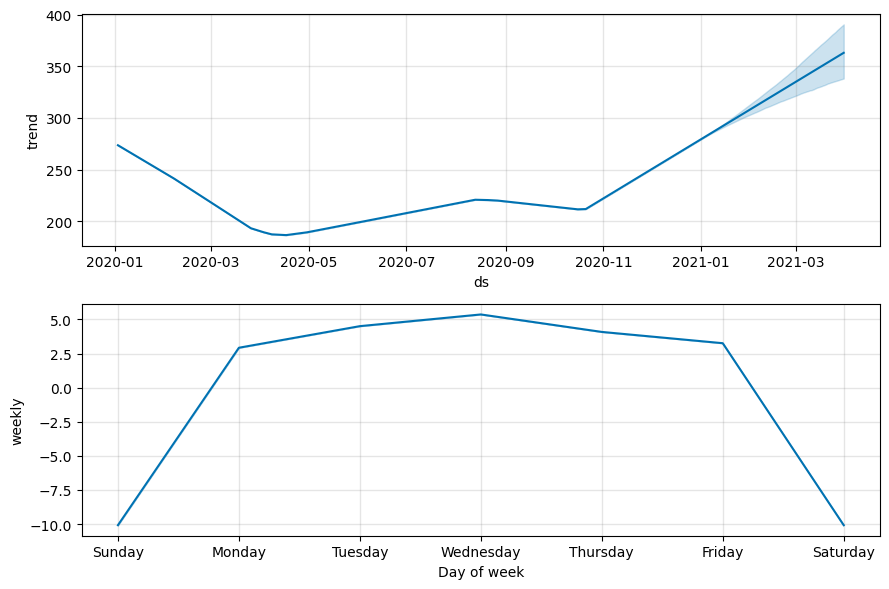

In [39]:
fig4 = model.plot_components(forecasted)

In [40]:
plot_plotly(model, forecasted)

In [41]:
y_true = df['Price'].head(64).values

print(y_true)

[291.02 293.25 293.3 291.22 286.66 285.79 282.6 288.65 285.47 279.25
 283.35 292.33 292.74 284.93 286 282.24 285.79 277.5 274.75 278.01 279.1
 273.58 270.17 270.71 271.9 273.71 270.51 271.34 266.99 270.9 270.9 271.81
 266 264.7 265.9 268.98 275.2 271.7 270.11 263.53 263.15 263.8 258.11
 265.96 265.5 269.34 265.3 268.25 274.4 279.8 278.19 279.79 276.9 284.79
 283.78 289.99 289.49 283.64 272.93 275.2 272 271.65 272 274.7]


In [42]:
y_pred = forecast['yhat'].tail(64).values
print(y_pred)

[309.16198323 308.82062434 308.93316388 296.53102487 297.4705806
 311.41911313 313.94141392 315.73886126 315.39750237 315.51004192
 303.10790291 304.04745864 317.99599117 320.51829196 322.3157393
 321.97438041 322.08691996 309.68478095 310.62433668 324.5728692
 327.09517    328.89261734 328.55125845 328.66379799 316.26165898
 317.20121471 331.14974724 333.67204803 335.46949537 335.12813649
 335.24067603 322.83853702 323.77809275 337.72662528 340.24892607
 342.04637341 341.70501452 341.81755407 329.41541506 330.35497079
 344.30350332 346.82580411 348.62325145 348.28189256 348.39443211
 335.9922931  336.93184883 350.88038135 353.40268215 355.20012949
 354.8587706  354.97131014 342.56917113 343.50872686 357.45725939
 359.97956018 361.77700752 361.43564863 361.54818818 349.14604917
 350.0856049  364.03413743 366.55643822 368.35388556]


In [43]:
MAE = mean_absolute_error(y_true, y_pred)

In [44]:
print('MAE: %.3f' % MAE)

MAE: 56.890


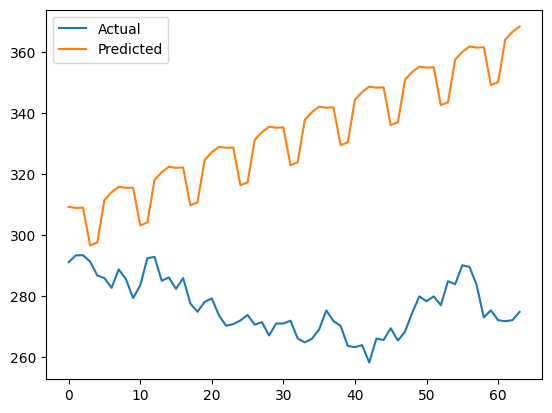

In [45]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Calculate moving averages (adjust window size as needed)
window = 1000
forecast['rolling_mean'] = forecast['yhat'].rolling(window=window).mean()

# Generate buy/sell/hold recommendations based on forecast and moving averages
forecast['signal'] = 1  # 0: HOLD, 1: BUY, -1: SELL


In [ ]:
for i in range(window, len(forecast)):
    if forecast['yhat'][i] > forecast['rolling_mean'][i]:
        forecast['signal'][i] = 1
    elif forecast['yhat'][i] < forecast['rolling_mean'][i]:
        forecast['signal'][i] = -1

# Backtesting the strategy
capital = 100000  # Initial capital
shares_held = 0
capital_history = []

for i in range(window, len(forecast)):
    if forecast['signal'][i] == 1 and capital > 0:
        shares_held = capital / forecast['yhat'][i]
        capital = 0
    elif forecast['signal'][i] == -1 and shares_held > 0:
        capital = shares_held * forecast['yhat'][i]
        shares_held = 0

    capital_history.append(capital + shares_held * forecast['yhat'][i])

# Plot the backtest results
plt.plot(forecast['ds'][window:], capital_history)
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Backtest Results')
plt.show()
